In [1]:
# Import all the modules we'll be using for this tutorial

import numpy as np
import matplotlib.pylab as plt

# For manipulating and plotting the data
import pandas as pd

# For plotting the data a little prettier
import seaborn as sns


In [2]:
filename = 'datasets/gun_violence_data.csv'

# Bellis
#filename = 'gun_violence_school_shootings.csv'

df = pd.read_csv(filename)

df

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2741819,"October 28, 2023",Massachusetts,Worcester,486 Chandler St,Worcester State University,1,1,0,0,0,NaN
1,2741317,"October 27, 2023",Maryland,Baltimore,2201 Presstman St,Carver Vocational-Technical High School,0,1,0,2,5,NaN
2,2741290,"October 27, 2023",Maryland,Edgewood,2415 Willoughby Beach Rd,Edgewood High School,0,0,0,0,1,NaN
3,2741256,"October 27, 2023",Wisconsin,Madison,"2222 E Washington Ave, Madison",Madison East High School,0,0,0,0,1,NaN
4,2740874,"October 27, 2023",Utah,Logan,162 W 100 S,Logan High School,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2222261,"January 28, 2022",Oklahoma,Oklahoma City (Midwest City),213 Elm St,Midwest City High School,0,0,0,0,1,NaN
1996,2223798,"January 27, 2022",Tennessee,Clarksville,241 E Pine Mountain Rd,Kenwood Middle School,0,0,0,0,1,NaN
1997,2221413,"January 27, 2022",Kentucky,Louisville,5901 Greenwood Rd,Pleasure Ridge Park High School,0,0,0,0,0,NaN
1998,2221403,"January 27, 2022",California,Porterville,465 W Olive Ave,Porterville High School,0,0,0,0,1,NaN


In [3]:
incidents_by_state = df.groupby('State')['Incident ID'].count()
injuries_by_state = df.groupby('State')['Victims Injured'].sum()
fatalities_by_state = df.groupby('State')['Victims Killed'].sum()
print("Number of incidents in each state:")
print(incidents_by_state)

print("Number of injuries in each state:")
print(injuries_by_state)

print("Number of fatalities in each state:")
print(fatalities_by_state)

Number of incidents in each state:
State
Alabama                  56
Alaska                    6
Arizona                  39
Arkansas                 28
California               97
Colorado                 24
Connecticut               7
Delaware                  9
District of Columbia      9
Florida                 146
Georgia                 103
Hawaii                    1
Idaho                     2
Illinois                 58
Indiana                  67
Iowa                     11
Kansas                   17
Kentucky                 59
Louisiana                40
Maine                     4
Maryland                 72
Massachusetts            18
Michigan                 51
Minnesota                36
Mississippi              27
Missouri                 31
Montana                   2
Nebraska                 12
Nevada                   33
New Hampshire             2
New Jersey               10
New Mexico               25
New York                 43
North Carolina          129
North D

In [4]:
incidents_by_state.sort_values(ascending=False)

State
Texas                   176
Florida                 146
North Carolina          129
Georgia                 103
California               97
South Carolina           97
Ohio                     97
Virginia                 90
Tennessee                83
Maryland                 72
Indiana                  67
Kentucky                 59
Pennsylvania             58
Illinois                 58
Alabama                  56
Michigan                 51
New York                 43
Louisiana                40
Arizona                  39
Minnesota                36
Wisconsin                35
Nevada                   33
Missouri                 31
Arkansas                 28
Mississippi              27
New Mexico               25
Washington               25
Oklahoma                 24
Colorado                 24
Massachusetts            18
Kansas                   17
Utah                     16
Nebraska                 12
Iowa                     11
New Jersey               10
Delaware      

# Population file

In [5]:
filename = 'datasets/population_dataset.csv'
dfpop = pd.read_csv(filename)

dfpop.sample(3)

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
61,40,4,9,53,Washington,7705267,7724566,7741433,7784477,7812880,...,1.905451,1.809906,4.807705,3.708192,-1.993793,-0.604409,-1.958793,-0.183887,4.203296,1.749399
54,40,3,5,45,South Carolina,5118422,5132151,5193848,5282955,5373555,...,-0.238540,0.780167,1.998129,1.743723,13.048229,15.921078,15.495129,13.828396,17.919207,17.238852
10,30,3,7,0,West South Central,40774145,40865965,41208410,41683546,42198606,...,3.958601,1.223086,3.240363,3.583218,5.055731,5.368482,4.739220,6.278817,8.608845,8.322438


In [6]:
grouped = dfpop.groupby('REGION')

grouped.groups.keys()

grouped.get_group('1')['NAME']

1     Northeast Region
2          New England
3      Middle Atlantic
20         Connecticut
33               Maine
35       Massachusetts
43       New Hampshire
44          New Jersey
46            New York
52        Pennsylvania
53        Rhode Island
59             Vermont
Name: NAME, dtype: object

*Italics!*

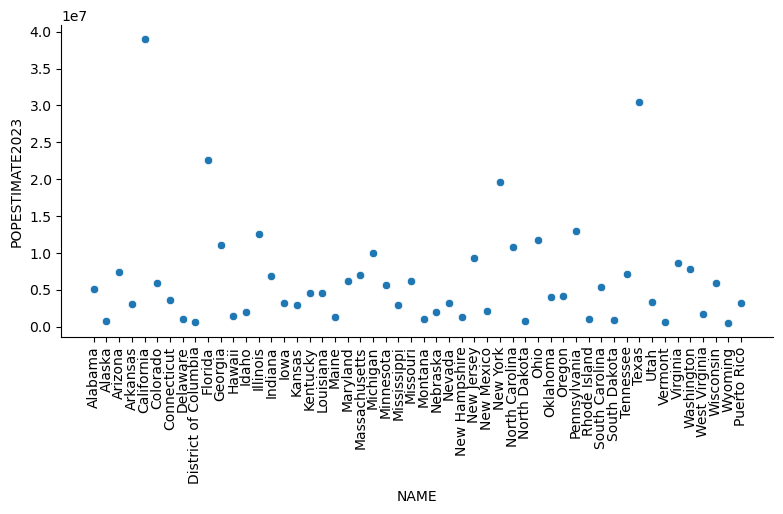

In [7]:
mask = dfpop['STATE'] > 0

sns.relplot(data=dfpop[mask], x='NAME', y='POPESTIMATE2023', height=4, aspect=2)

plt.xticks(rotation=90);


In [8]:
state = 'Alabama'
x = incidents_by_state[state]
y = dfpop[dfpop['NAME']==state]['POPESTIMATE2023'].values[0]
print(x)
print(y)

56
5108468


In [9]:
total_victims = df["Victims Killed"].sum() 
total_victims

105

In [10]:
population_sum = dfpop["POPESTIMATE2021"].sum()
population_sum

1331458601

In [11]:
dfpop['STATE'] = dfpop['STATE'].astype(str)

merged_df = pd.merge(df, dfpop, left_on="State", right_on="STATE")

percentage_involved = (total_victims / population_sum) * 100
percentage_involved

7.88608822843903e-06

# Gun ownership laws

In [12]:
filename = 'datasets/TL-354-State-Level Estimates of Household Firearm Ownership.xlsx'

dfgo = pd.read_excel(filename, sheet_name='State-Level Data & Factor Score')

dfgo

,FIP,Year,STATE,HFR,HFR_se,universl,permit,Fem_FS_S,Male_FS_S,BRFSS,GALLUP,GSS,PEW,HuntLic,GunsAmmo,BackChk,PewQChng,BS1,BS2,BS3
0,1,1980,Alabama,0.608,0.031,0,0,0.824324,0.833795,-9.0,0.55395,0.583632,-9.000000,0.291102,-0.509164,-9.000000,0,0.0,0.0,0.0
1,1,1981,Alabama,0.597,0.047,0,0,0.692308,0.831126,-9.0,-9.00000,-9.000000,-9.000000,0.294962,-0.618954,-9.000000,0,1.0,0.0,0.0
2,1,1982,Alabama,0.661,0.036,0,0,0.771739,0.821429,-9.0,-9.00000,0.655196,-9.000000,0.290545,-0.526692,-9.000000,0,2.0,0.0,0.0
3,1,1983,Alabama,0.586,0.038,0,0,0.688172,0.819277,-9.0,0.61144,-9.000000,-9.000000,0.284983,-0.713227,-9.000000,0,3.0,0.0,0.0
4,1,1984,Alabama,0.624,0.036,0,0,0.710000,0.775956,-9.0,-9.00000,0.626933,-9.000000,0.281622,-0.733305,-9.000000,0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,56,2012,Wyoming,0.597,0.029,0,0,0.375000,0.647482,-9.0,0.66206,-9.000000,0.622224,0.545627,2.973924,1.562481,0,12.0,12.0,8.0
1846,56,2013,Wyoming,0.613,0.032,0,0,0.529412,0.714286,-9.0,-9.00000,-9.000000,0.685266,0.542697,3.066252,1.638737,1,12.0,12.0,9.0
1847,56,2014,Wyoming,0.608,0.044,0,0,0.583333,0.666667,-9.0,-9.00000,-9.000000,-9.000000,0.538761,3.092854,1.603822,1,12.0,12.0,10.0
1848,56,2015,Wyoming,0.549,0.032,0,0,0.393939,0.661290,-9.0,-9.00000,-9.000000,0.611531,0.544356,2.910414,1.348323,1,12.0,12.0,11.0


In [13]:
dfgo['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])